# Проект "Анализ бизнес показателей"
___

Работа по маркетинговому анализу развлекательного приложения Procrastinate Pro+. 

**Цель** -   определение причин снижения эффективности привлечения пользователей и помощь компании выйти в плюс.

Основа: данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
  - лог сервера с данными об их посещениях,
  - выгрузка их покупок за этот период,
  - рекламные расходы.

Данные о визитах, заказах и рекламных расходах

Пути к файлам

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).


In [209]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [210]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'), 
    pd.read_csv('/datasets/costs_info_short.csv'),
)

## Предобработка данных

### Таблица визитов

In [211]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [212]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [213]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

In [214]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [215]:
visits.duplicated().sum()

0

In [216]:
visits['Channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

In [217]:
visits['Device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

In [218]:
visits['Region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

In [219]:
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

### Таблица заказов

In [220]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [221]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

In [222]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [223]:
orders.duplicated().sum()

0

In [224]:
orders.columns=['user_id', 'event_dt', 'revenue']

### Таблица расходов

In [225]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [226]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [227]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [228]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [229]:
costs.duplicated().sum()

0

In [230]:
costs['Channel'].value_counts()

TipTop                180
RocketSuperAds        180
YRabbit               180
LeapBob               180
FaceBoom              180
OppleCreativeMedia    180
AdNonSense            180
WahooNetBanner        180
lambdaMediaAds        180
MediaTornado          180
Name: Channel, dtype: int64

In [231]:
costs.columns=['dt', 'channel', 'costs']

### Выводы по предобработке
Выведено три исходные таблицы с данными по покупателям, заказам и покупкам. Пропусков и дубликатов в таблицах не обнаружено. Столбцы с датой и временем приведены к соответствующему типу данных. Названия столбцов приведены к нижнему регистру и общепризнанному стилю.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция создания профилей пользователей

In [232]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

### Функция подсчёта коэффициента удержания

In [233]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

### Функция подсчёта конверсии

In [234]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    if 'cohort' in dimensions: 
        dimensions = []
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

### Функция подсчёта LTV и ROI

In [235]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time,
    )

### Функция для сглаживая данных

In [236]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания

In [237]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

In [238]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI

In [239]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Профили пользователей

In [240]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


Созданы профили пользователей по данным сессий из датафрейма `visits`, по выгрузке покупок из датафрейма `orders`, по расходам на рекламу из датафрейма `costs`. Получили **150007** пользовательских профилей. В каждом из них есть данные о дате первого посещения и источнике, который мотивировал пользователя посетить приложение, стране пользователя, о используемом устройстве, о факте совершения покупки и о стоимости привлечения данного пользователя

In [241]:
min_analysis_date = visits['session_start'].min()
observation_date = visits['session_start'].max()
min_analysis_date

Timestamp('2019-05-01 00:00:41')

In [242]:
analysis_horizon = 14
max_analysis_date = observation_date - timedelta(days=analysis_horizon-1)
max_analysis_date

Timestamp('2019-10-18 23:59:23')

Минимальная дата привлечения пользователей: `1 мая 2019`


Максимальная дата включения в анализ пользователей, с учтом горизонта анализа: `18 октября 2019`

### Платящие пользователи по странам

In [243]:
profiles.groupby('region').agg({'payer': 'mean'}).sort_values(by='payer', ascending = False)

,payer
region,
United States,0.069019
Germany,0.041119
UK,0.039829
France,0.037994


In [244]:
profiles.groupby('region').agg({'payer': 'sum'}).sort_values(by='payer', ascending = False)

,payer
region,
United States,6902
UK,700
France,663
Germany,616


Выше отображено общее число платящих пользователей приложения, которые стали платящими в каждой стране, и их доля от общего числа. Наибольшая доля в США - **6,9%**, наименьшая - во Франции - **3,7%**

### Платящие пользователи по используемым устройствам

In [245]:
profiles.groupby('device').agg({'payer': 'mean'}).sort_values(by='payer', ascending = False)

,payer
device,
Mac,0.063644
iPhone,0.062079
Android,0.058518
PC,0.050468


Наибольшая доля пользователей приложения, совершивших покупку, используют устройства  `Mac` **6,3%** и `iPhone`**6,2%**. Наименьшая доля - пользователи `PC`**5%**

### Платящие пользователи по рекламным источникам привлечения

In [246]:
profiles.groupby('channel').agg({'payer': 'mean'}).sort_values(by='payer', ascending = False)

,payer
channel,
FaceBoom,0.122049
AdNonSense,0.113402
lambdaMediaAds,0.104700
TipTop,0.096007
RocketSuperAds,0.079137
WahooNetBanner,0.052964
YRabbit,0.038265
MediaTornado,0.035747
LeapBob,0.030633


Наибольшую долю платящих пользователей привлекла реклама на платформе `FaceBoom` **12,2%**. Наименьшую (не считая органических пользователей) - `OppleCreativeMedia` **2,7%**

## Маркетинг

### Расходы на маректинг

In [247]:
round(costs['costs'].sum())

105497

Общая сумма расходов на маркетинг **105497 $**

### Распределение расходов на маркетинг по источникам привлечения

In [248]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


На таблице выше выведено количество средств в $, распределенных по рекламным источника. Наибольшее количество потрачено на `TipTop` **54751** и `FaceBoom` **32446**.  Наименьшее - `YRabbit` - **944**

### Визуализация динамики изменения расходов во времени по неделям и месяцам по каждому источнику привлечения пользователей

In [249]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week

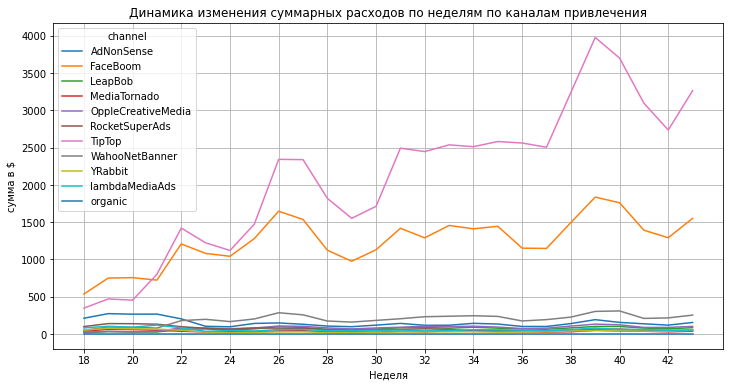

In [250]:
profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(12, 6))
plt.ylabel('сумма в $')
plt.xlabel('Неделя')
plt.xticks(np.arange(min(profiles['week']), max(profiles['week']), 2.0))
plt.title('Динамика изменения суммарных расходов по неделям по каналам привлечения')
plt.show()

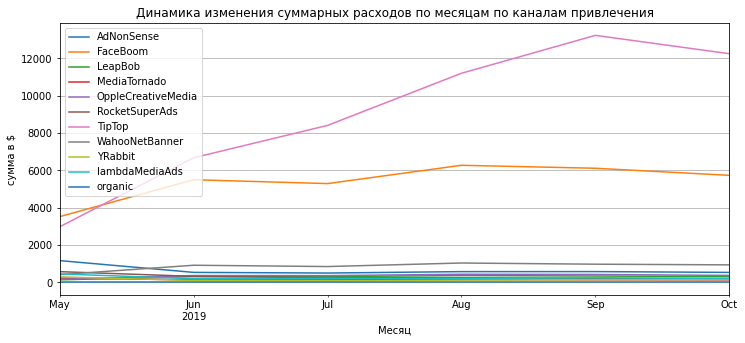

In [251]:
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(12, 5))
plt.ylabel('сумма в $')
plt.xlabel('Месяц')
plt.title('Динамика изменения суммарных расходов по месяцам по каналам привлечения')
plt.legend(loc='upper left')
plt.show()

На визуализациях по выше не отмечается существенной динамики расходов по большинству каналов привлечения кроме двух: `TipTop` и `FaceBoom`. На данные рекламные каналы отмечается повышение расходов, достигая пика к началу сентября, затем отмечается небольшое снижение

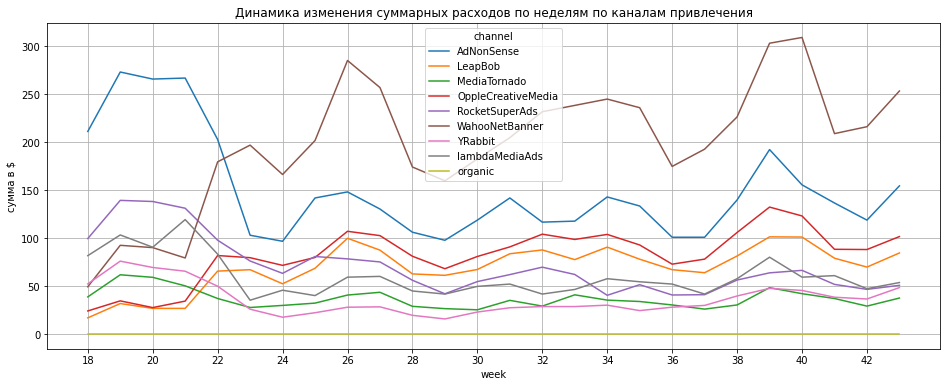

In [252]:
profiles.query('channel != "FaceBoom" and channel != "TipTop"').pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(16, 6))
plt.ylabel('сумма в $')
plt.xticks(np.arange(min(profiles['week']), max(profiles['week']), 2.0))
plt.title('Динамика изменения суммарных расходов по неделям по каналам привлечения')
plt.show()

Выше визуализированы источники привлечения (исключая двух топовых каналов)с динамикой уровня расходов по неделям. Отмечается колебание финансирования рекламы каждые 1,5 месяца по каждому каналу соответственно в течение всего наблюдения

### Стоимость привлечения одного пользователя  по источникам

In [253]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


На таблице выше представлена средня стоимость привлечения одного пользователя в зависимости от источника привлечения. Наибольшая сумма привлечения одного пользователя канала `TipTop` **2,8** доллара и канала `FaceBoom`**1,1** долларов

### Выводы по расходам на маркетинг

Общая сумма расходов на маркетинг **105497** долларов. Из них наибольшее количество в $ потрачено на `TipTop` **54751** и `FaceBoom` **32446**, причём отмечается постепенное увеличение выделенной суммы на данные каналы, достигая максимума в сентябре 2019г. Соответственно средня стоимость привлечения одного пользователя по данным каналам практически в несколько крат выше, по сравнению с другими каналами. Привлечения одного пользователя канала `TipTop` **2,8** доллара и канала `FaceBoom`**1,1** долларов

## Оценка окупаемости рекламы

### Общий анализ окупаемости рекламы c помощью графиков

In [254]:
profiles = profiles.query('channel != "organic"')

In [255]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon)

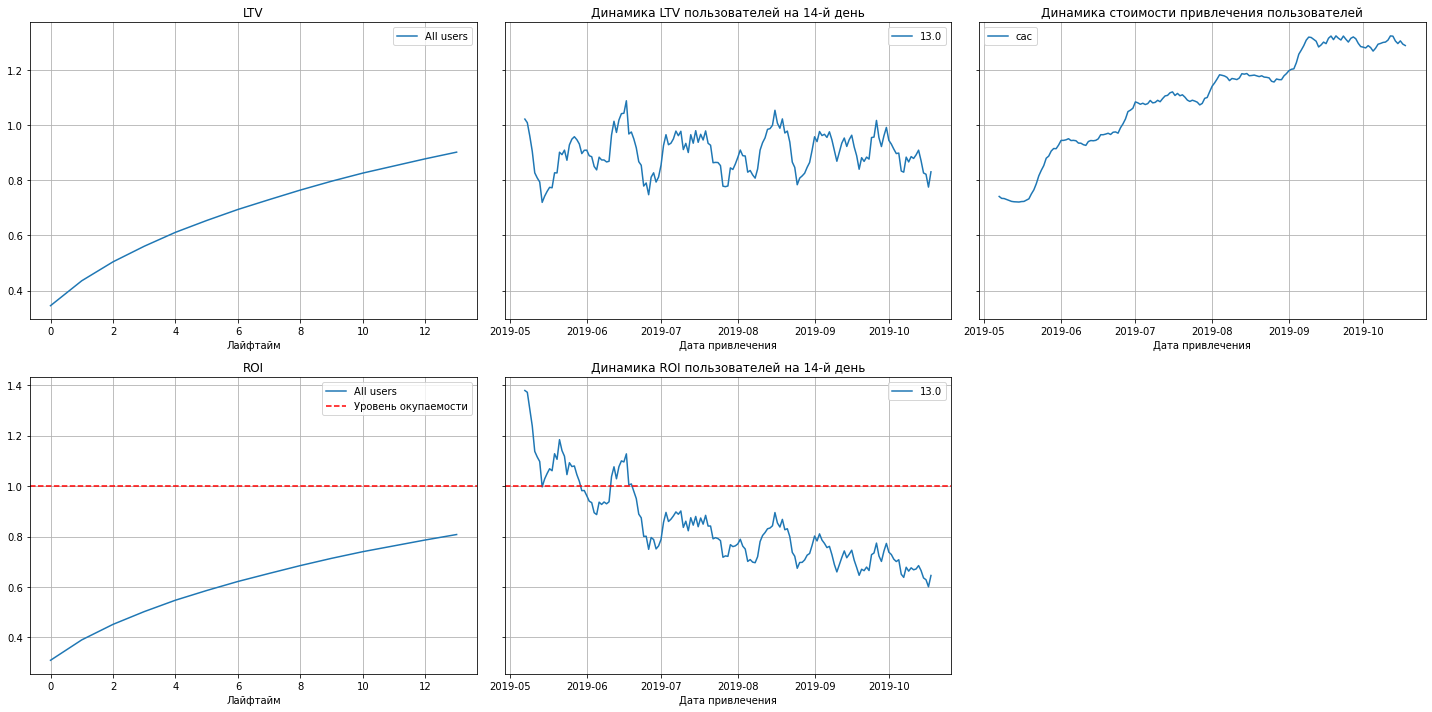

In [256]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

* LTV растёт; при оценке динамики LTV на 14-й день отмечается закономерность: пользователи, привлеченные в июне-июле августе - LTV на 14 день резко уменьшаяется к концу месяца, у пользователей, привлеченных в сентрябре - LTV на 14 день увеличивается к концу месяца.
* САС стабильно высокий с тенденцией к повышению
* Реклама не окупается. ROI не доходит до уровня окупаемости.


### Конверсия пользователей и динамика её изменения

In [257]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

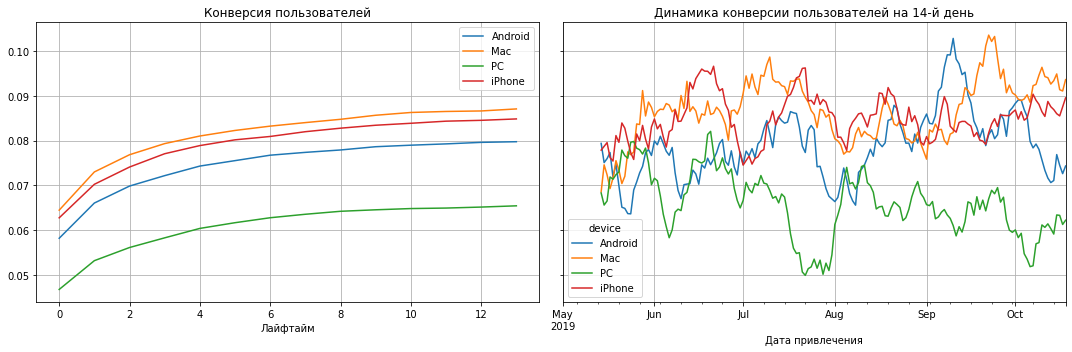

In [258]:
plot_conversion(conversion_grouped, conversion_history, analysis_horizon, window=14)

Выведены графики конверсии и динамики конверсии пользователей на 14-й день по устройствам. Наибольшая конверсия наблюдается у пользователей, использующих устройства **Mac** и **iPhone**. Наименьшая конверсия у пользователей на **PC**.

При оценке динамики отмечается увеличение конверсии пользователей, привлеченных **в середине июня и середине июля** на всех типах устройств. Кроме того максимальная конверсия пользователей на 14-й день отмечается в **сентябре** на устройствах **Android** и **Mac**

In [259]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

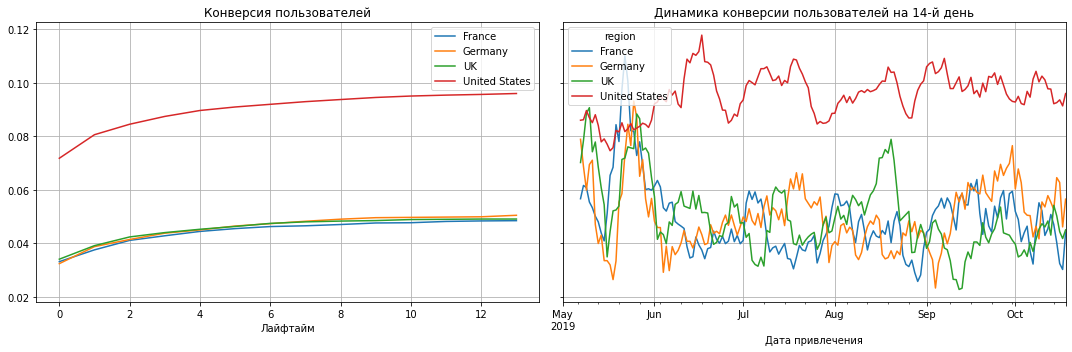

In [260]:
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Выведены графики конверсии и динамики конверсии пользователей на 14-й день по странам. Наибольшая конверсия отмечается у пользователей из **США**, наименьшая конверсия - у пользователей из **Франции**. 

При оценке динамики наблюдается отсутствие синхронности в графиках: наибольшая конверсия пользователей из **США** наблюдается у привлеченных в середине **июня**, у пользователей из **Германии** - привлеченных в середине **июля**, у пльзователей из **Великобритании** - в середине мая и августа, у пользователей из **Франции** - привлеченных в конце мая. 

### Удержание пользователей и динамика её изменения

In [261]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['device']
)

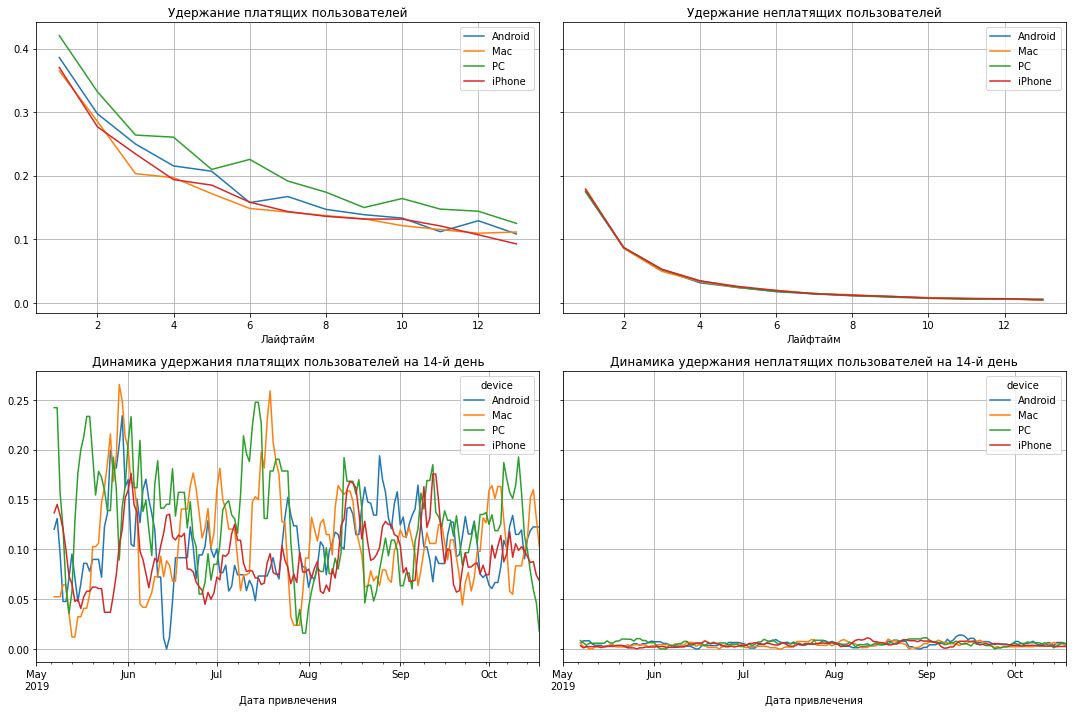

In [262]:
plot_retention(retention_grouped, retention_history, analysis_horizon) 

На графике удержания пользователей в зависимости от устройства наименьший коэфициент удержания у пользователей устройств PC и iPhone.

In [263]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['region']
)

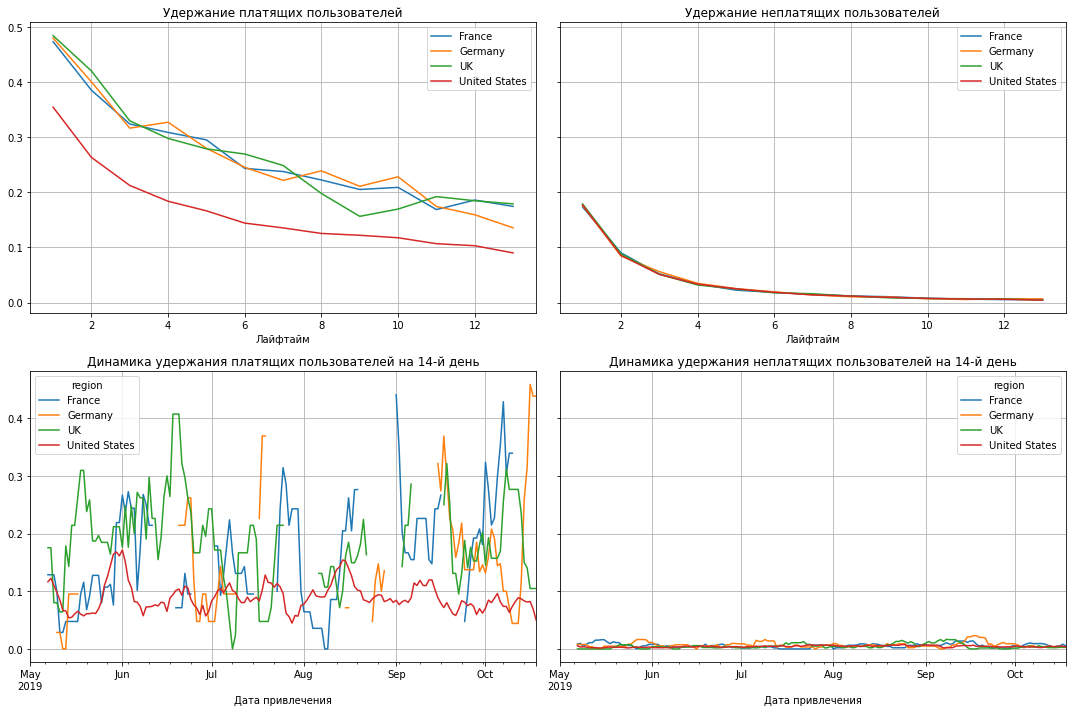

In [264]:
plot_retention(retention_grouped, retention_history, analysis_horizon)

На графиках удержания в зависимости от страны наблюдаетя стабильно низкое удержание у пользователей из США. Для платящих пользователей из **США** удержание 14-го дня ниже, чем в остальных странах, примерно на **20%**. Это низкий показатель. 

### Окупаемость рекламы с разбивкой по устройствам

In [265]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

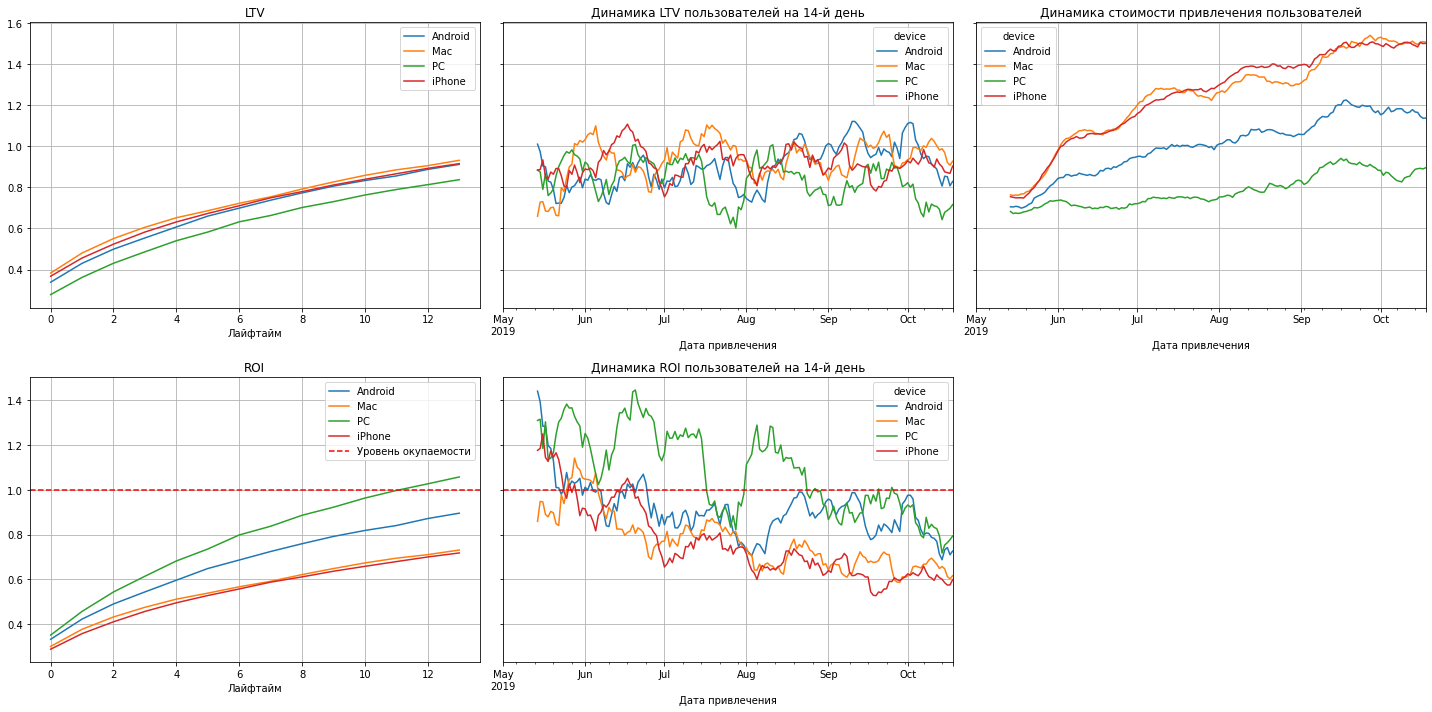

In [266]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

При анализе графиков окупаемости по разбивке по устройствам отмечается:
* LTV по всем устройстав растёт и держится стабильно в течение всего периода наблюдения,
* расходы на маркетинг на устройства PC самые низкие
* затраты на маркетинг на PC окупаются уже на 11 день после привлечения,
* затраты на маркетинг на Android НЕ окупаются,
* затраты на маректинг на Mac и iPhone самые большие, и они НЕ окупаются. И это несмотря на то, что конверсия на этих устройствах наибольшая

### Окупаемость рекламы с разбивкой по странам

In [267]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

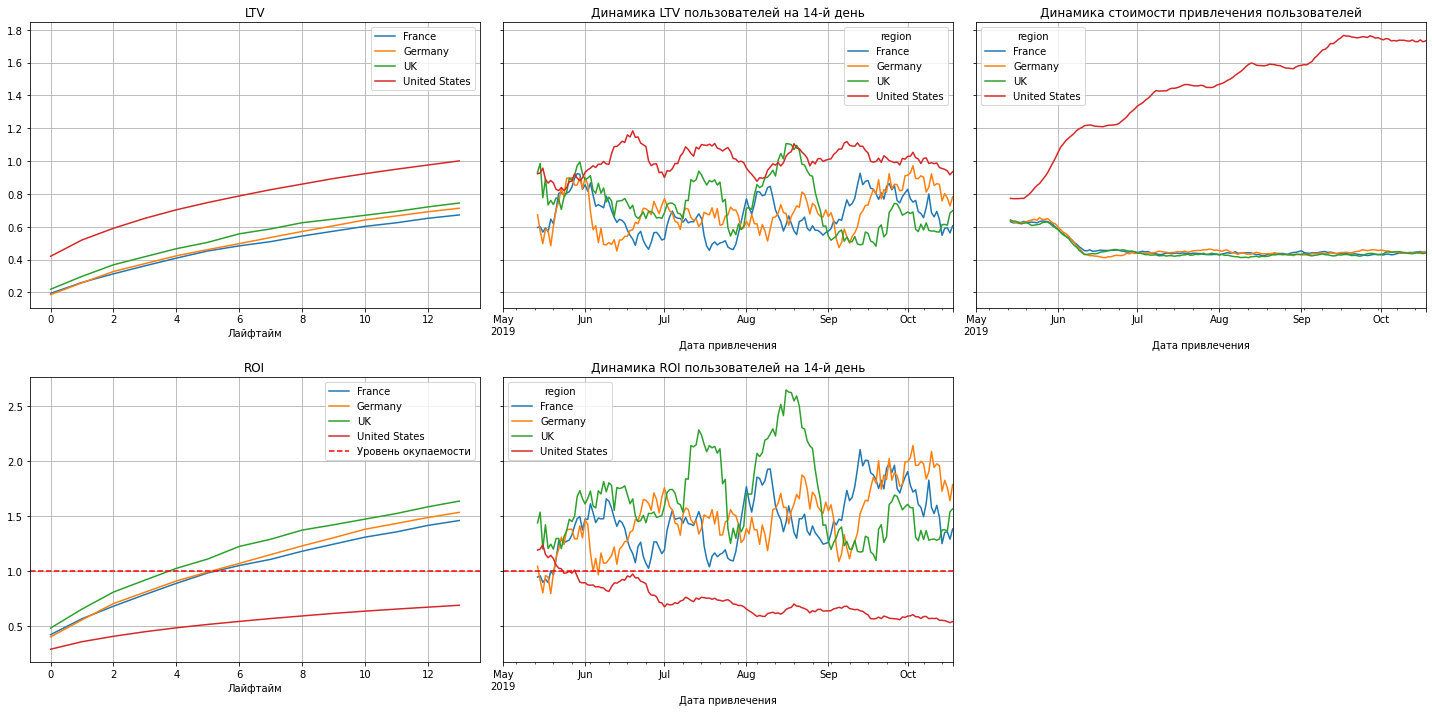

In [268]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

При анализе графиков окупаемости по разбивке по странам отмечается:

* LTV по всем устройстав растёт и держится стабильно в течение всего периода наблюдения,
* Наибольшая стоимость привлечения пользователей отмечается в США, и эта стоимость увеличивается с каждым месяцем,
* расходы на маркетинг окупаются во Франции, Германии, Великобритании уже на 4-5 день после привлечения и к 14 дню достигают 150%, и показатель сохраняется в течение всего периода наблюдения,
* расходы на маркетинг НЕ окупаются в США и динамика ROI пользователей из США на 14-й день только снижается

### Окупаемость рекламы с разбивкой по рекламным каналам

In [269]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

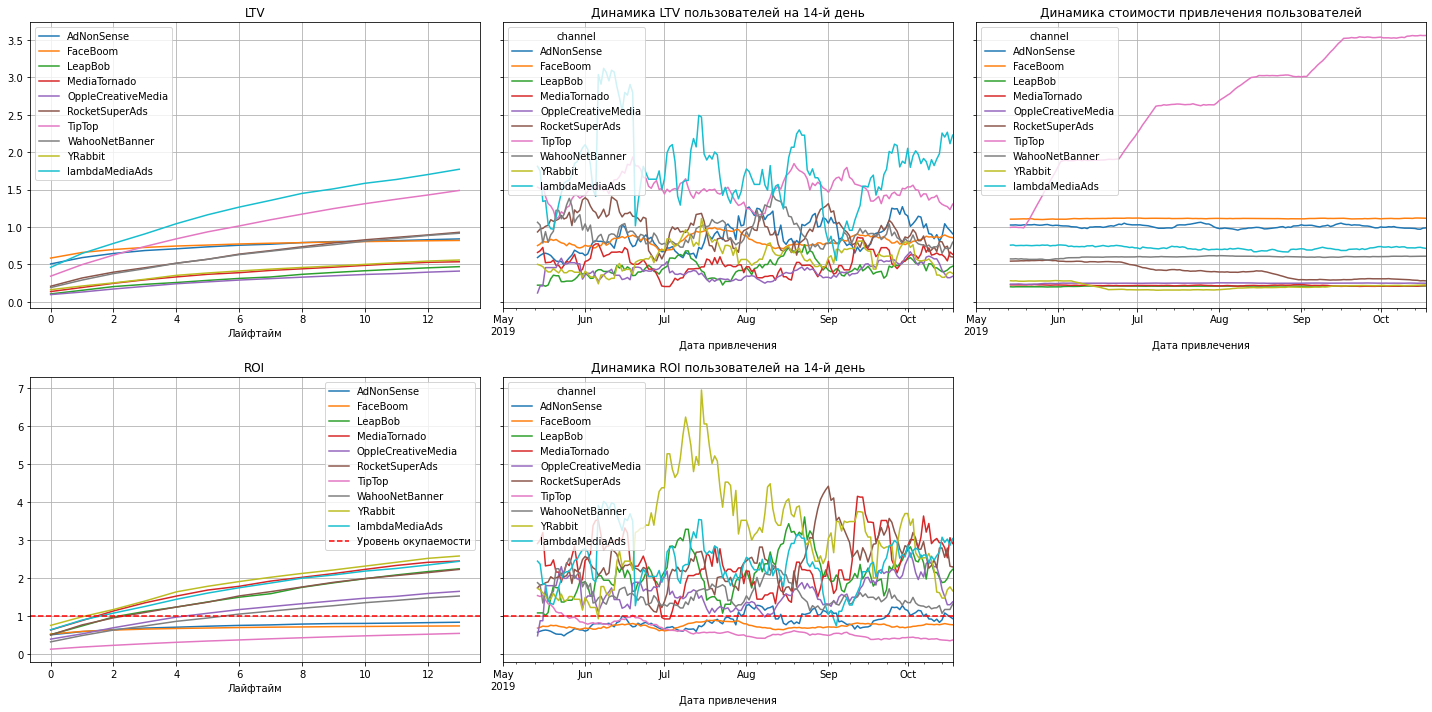

In [270]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

При анализе графиков окупаемости по разбивке по каналам привлечения отмечается:
* стоимость привлечения пользователей прогрессивно увеличивается у канала TipTop,
* расходы на маркетинг на каналах TipTop, FaceBoom, AdNonSense НЕ окупаются. При этом судя по динамике ROI по каналам **TipTop** и **FaceBoom** расходы не окупаются в течение всего периода наблюдения
* расходы на маркетинг на остальных каналах окупаются, начиная со 2-4 суток после привлечения

### Выводы по оценке окупаемости рекламы

- Реклама не окупается.
- На окупаемость рекламы оказывают негативное влияние каналы TipTop и FaceBoom, размещение рекламы в США и на устройствах Mac и iPhone
- Проблемы окупаемости могут быть вызваны как неправильной маркетинговой стратегией в конкретной стране, так и техническими ошибками

## Выводы

Проведен маркетинговый анализ развлекательного приложения Procrastinate Pro+. Сделаны следующие выводы по исследованию:

### Низкая эффективность привлечения

- Несмотря на хорошую конверсию пользователей iPhone и Mac на этих устройставх реклама не окупается, и это связано с плохим удержанием. Это может быть технической ошибкой.
- На окупаются расходы на каналы TipTop и FaceBoom, причём даже повышение расходов на эти каналы не приводит к окупаемости.
- Реклама в США не окупается, хотя конверсия пользователей в этой стране наивысшая, а вот удержание резко падает. Это так же может быть техническим сбоем.

### Рекомендации по маркетингу

- Запросить отчёт по техническим ошибкам, чтобы определить почему падает удержание пользователей в США и на устройствах iPhone и Mac. Если это технические ошибки -  то следует привлечь разработчиков.
- Перенаправить частично расходы на маркетинг из каналов привлечения TipTop и FaceBoom в другие каналы. Причём не польностью прекратить, а уменьшить расходы на эти каналы, для того чтобы оценить их окупаемость. Освободившиеся средстав перенапарвить на каналы с большей конверсией и LTV, например на канал YRabbit и lambdaMediaAds.
- Следует изменить рекламную стратегию для пользователей с устройствами PC, так как конверсия низкая. Эти пользователи с высоким удержанием, поэтому при увеличении их конверсии могут появится больше благодарных пользователей. Вероятная им требуется дополнительная маркетинговая стимуляция или бонусы для конверсии.
- Следует подумат над рекламной стратегией во Франции, так как там низкая конверсия, низкое удержание и маленький LTV. Вероятно потребует дополнительная рекламная компания.